# UC6 - curve fitting
https://github.com/openEOPlatform/SRR2_notebooks/blob/main/UC6_process_graphs/UC6_fit.json

In [60]:
from eo_utils import *

In [61]:
openeo.__version__

'0.7.0'

In [96]:
euracHost = "https://openeo.eurac.edu"
eurac = openeo.connect(euracHost).authenticate_oidc_authorization_code()

In [97]:
eurac.describe_account()

{'user_id': 'dfd05cf2-30d1-4139-9cda-493787936318',
 'name': 'MIchele Claus',
 'links': None}

In [65]:
eurac.list_collections()

[{'engine': 'WCPS',
  'stac_version': '0.9.0',
  'stac_extensions': ['datacube'],
  'id': 'ADO_CORINE_100m_3035',
  'title': 'Corine Land Cover (CLC) 2018',
  'description': 'CLC2018 is one of the Corine Land Cover (CLC) datasets produced within the frame the Copernicus Land Monitoring Service referring to land cover / land use status of year 2018. CLC service has a long-time heritage (formerly known as "CORINE Land Cover Programme"), coordinated by the European Environment Agency (EEA). It provides consistent and thematically detailed information on land cover and land cover changes across Europe.',
  'keywords': ['Copernicus',
   'Land',
   'Satellite Image Interpretation',
   '2018',
   'Corine',
   'Corine Land Cover',
   'ADO project'],
  'version': 'v1',
  'deprecated': False,
  'license': 'CC-BY-4.0',
  'sci:citation': 'Copyright holder: European Environment Agency (EEA)',
  'providers': [{'name': 'Eurac EO WCS',
    'url': 'http://www.eurac.edu',
    'roles': ['host']},
   {'name': 'European Environment Agency (EEA)',
    'url': 'copernicus@eea.europa.eu',
    'roles': ['Producer']}],
  'extent': {'spatial': {'bbox': [[4.007710199040072,
      42.8856831393187,
      17.506871070250423,
      50.319480285426245]]},
   'temporal': {'interval': [[None, None]]}},
  'links': [{'rel': 'licence',
    'href': 'https://creativecommons.org/licenses/by/4.0/',
    'type': 'text/html',
    'title': 'License Link'}],
  'cube:dimensions': {'X': {'type': 'spatial',
    'axis': 'x',
    'extent': [4.007710199040072, 17.506871070250423],
    'reference_system': 3035},
   'Y': {'type': 'spatial',
    'axis': 'y',
    'extent': [42.8856831393187, 50.319480285426245],
    'reference_system': 3035},
   'bands': {'type': 'bands', 'values': ['CLC2018_WM']}},
  'summaries': {'constellation': [None],
   'platform': [None],
   'rows': 8332,
   'columns': 10240,
   'instruments': [None],
   'eo:cloud cover': {'min': 0.0, 'max': 0.0},
   'gsd': [100.0],
   'eo:bands': [{'name': 'CLC2018_WM',
     'common_name': 'Corine Land Cover ID',
     'center_wavelength': 0.0,
     'gsd': 100.0}]},
  'assets': {}},
 {'engine': 'WCPS',
  'stac_version': '0.9.0',
  'stac_extensions': ['datacube'],
  'id': 'ADO_EU_DEM_25m_3035',
  'title': 'Copernicus Land Monitoring Service - EU-DEM',
  'description': 'EU-DEM is a digital surface model (DSM) of EEA member and cooperating countries representing the first surface as illuminated by the sensors. It is a hybrid product based on SRTM and ASTER GDEM data fused by a weighted averaging approach.',
  'keywords': ['elevation', 'terrain', 'ADO project'],
  'version': 'v1',
  'deprecated': False,
  'license': 'CC-BY-4.0',
  'sci:citation': 'Copyright holder: European Environment Agency (EEA)',
  'providers': [{'name': 'Eurac EO WCS',
    'url': 'http://www.eurac.edu',
    'roles': ['host']},
   {'name': 'European Environment Agency (EEA)',
    'url': 'copernicus@eea.europa.eu',
    'roles': ['Producer']}],
  'extent': {'spatial': {'bbox': [[4.00836448784761,
      42.88526925644299,
      17.50816233265968,
      50.318718106310065]]},
   'temporal': {'interval': [[None, None]]}},
  'links': [{'rel': 'licence',
    'href': 'https://creativecommons.org/licenses/by/4.0/',
    'type': 'text/html',
    'title': 'License Link'}],
  'cube:dimensions': {'X': {'type': 'spatial',
    'axis': 'x',
    'extent': [4.00836448784761, 17.50816233265968],
    'reference_system': 3035},
   'Y': {'type': 'spatial',
    'axis': 'y',
    'extent': [42.88526925644299, 50.318718106310065],
    'reference_system': 3035},
   'bands': {'type': 'bands', 'values': ['EUElev_DEM_V11']}},
  'summaries': {'constellation': ['SRTM / ASTER GDEM'],
   'platform': ['SRTM / ASTER GDEM'],
   'rows': 33327,
   'columns': 40962,
   'instruments': [None],
   'eo:cloud cover': {'min': 0.0, 'max': 0.0},
   'gsd': [25.0],
   'eo:bands': [{'name': 'EUElev_DEM_V11',
     'common_name': 'Elevation',
     'center_wavelength': 0.0,
     'gsd': 25.0}]},
  'assets': {}},
 

We firstly need to define range of interest in time and requested bands from Sentinel-2 L1C data

In [66]:
center = [46.5, 11.35]
zoom = 12

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[46.5, 11.35], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [98]:
bbox = eoMap.getBbox()
print("Coordinates selected from map:",'\n west',bbox[0],'\n east',bbox[2],'\n south',bbox[1],'\n north',bbox[3])

Coordinates selected from map: 
 west 11.301225 
 east 11.393979 
 south 46.466151 
 north 46.523111


## AOI selection and preprocessing (cloud masking, data clipping)

In [99]:
print('Area Of Interest:','\nwest',bbox[0],'\neast',bbox[2],'\nsouth',bbox[1],'\nnorth',bbox[3])
spatial_extent  = {'west':bbox[0],'east':bbox[2],'south':bbox[1],'north':bbox[3]}
temporal_extent = ["2016-09-01", "2016-09-15"]

collection      = 'S2_L2A_T32TPS'
bands           = ["B02_10m","B03_10m","B04_10m",'B08_10m','B8A_20m']

l2a_bands = eurac.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

Area Of Interest: 
west 11.301225 
east 11.393979 
south 46.466151 
north 46.523111


In [90]:
l2a_bands.download("l2a_bands.nc",format="netCDF")

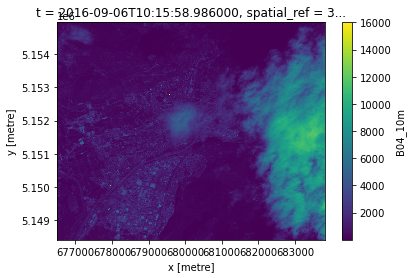

In [92]:
xr.open_dataset("l2a_bands.nc").B04_10m[0].plot.imshow()

In [100]:
collection      = 's2cloudless_alps'
cloud_bands = eurac.load_collection(collection,spatial_extent=spatial_extent,temporal_extent=temporal_extent)

In [101]:
from openeo.rest.datacube import PGNode
from openeo.rest.datacube import THIS

args_resample_cube_temporal= {
    "data": THIS,
    "method": "nearest",
    "target": l2a_bands}

cloud_bands_resampled = cloud_bands.process("resample_cube_temporal",args_resample_cube_temporal)

In [102]:
reducer = PGNode("gt", x={"from_parameter": "x"}, y=0)
cloud_bands_resampled = cloud_bands_resampled.apply(reducer)

In [103]:
l2a_bands_masked = l2a_bands.mask(mask=cloud_bands_resampled,replacement=0)

In [ ]:
l2a_bands_masked.download("l2a_bands_masked.nc",format="netCDF")

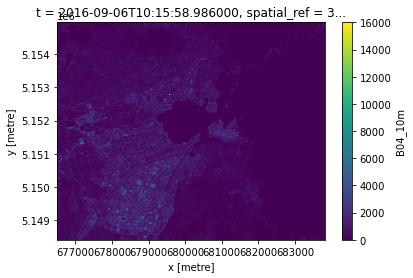

In [93]:
xr.open_dataset("l2a_bands_masked.nc").B04_10m[0].plot.imshow()

In [104]:
reducer = PGNode("clip", x={"from_parameter": "x"}, max=4000)
l2a_bands_masked_clipped = l2a_bands_masked.apply(reducer)

In [105]:
l2a_bands_masked_clipped.download("l2a_bands_masked_clipped.nc",format="netCDF")

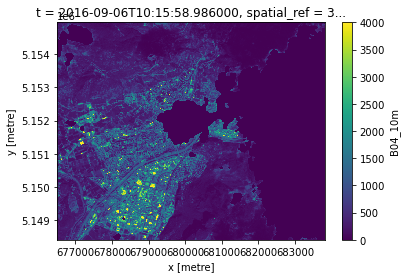

In [106]:
xr.open_dataset("l2a_bands_masked_clipped.nc").B04_10m[0].plot.imshow()

## Definition of fitting function for fit_curve process

We need to replicate the following math formula inside fit_curve:
```
$0+$1*cos(2*pi()/31557600*x)+$2*sin(2*pi()/31557600*x)
```

In [107]:
pi = PGNode("pi")

In [112]:
a0 = PGNode("array_element",data={"from_parameter": "parameters"},index=0)
a2 = PGNode("array_element",data={"from_parameter": "parameters"},index=1)
a1 = PGNode("array_element",data={"from_parameter": "parameters"},index=2)

In [113]:
# 2*pi
two_pi_0 = PGNode("multiply",x=2,y=pi)
two_pi_1 = PGNode("multiply",x=2,y=pi)

In [114]:
# 2*pi/31557600
two_pi_div_0 = PGNode("divide",x=two_pi_0,y=31557600)
two_pi_div_1 = PGNode("divide",x=two_pi_1,y=31557600)

In [115]:
# 2*pi/31557600*x
two_pi_div_mul_0 = PGNode("multiply",x=two_pi_div_0,y={"from_parameter": "x"})
two_pi_div_mul_1 = PGNode("multiply",x=two_pi_div_1,y={"from_parameter": "x"})

In [116]:
# cos(2*pi/31557600*x)
two_pi_div_mul_cos_0 = PGNode("cos",x=two_pi_div_mul_0)
# sin(2*pi/31557600*x)
two_pi_div_mul_sin_1 = PGNode("sin",x=two_pi_div_mul_1)

In [120]:
# fit_fun = a0 + a1*two_pi_div_mul_cos_0 + a2*two_pi_div_mul_sin_1 not working
a1_cos   = PGNode("multiply",x=a1,y=two_pi_div_mul_cos_0)
a2_sin   = PGNode("multiply",x=a2,y=two_pi_div_mul_sin_1)
a0_a1    = PGNode("add",x=a0,y=a1_cos)
fit_fun = PGNode("add",x=a0_a1,y=a2_sin)

In [123]:
args_fit_curve= {
    "data": THIS,
    "parameters": [1,1,1],
    "dimension": 't',
    "function": fit_fun}

curve_fitting = l2a_bands_masked_clipped.process("fit_curve",args_fit_curve)

## Output is different to what I would need, the fit_fun process_graph needs to be inside fit_curve process

In [127]:
print(curve_fitting.to_json())

{
  "process_graph": {
    "loadcollection1": {
      "process_id": "load_collection",
      "arguments": {
        "bands": [
          "B02_10m",
          "B03_10m",
          "B04_10m",
          "B08_10m",
          "B8A_20m"
        ],
        "id": "S2_L2A_T32TPS",
        "spatial_extent": {
          "west": 11.301225,
          "east": 11.393979,
          "south": 46.466151,
          "north": 46.523111
        },
        "temporal_extent": [
          "2016-09-01",
          "2016-09-15"
        ]
      }
    },
    "loadcollection2": {
      "process_id": "load_collection",
      "arguments": {
        "id": "s2cloudless_alps",
        "spatial_extent": {
          "west": 11.301225,
          "east": 11.393979,
          "south": 46.466151,
          "north": 46.523111
        },
        "temporal_extent": [
          "2016-09-01",
          "2016-09-15"
        ]
      }
    },
    "resamplecubetemporal1": {
      "process_id": "resample_cube_temporal",
      "arguments"

In [54]:
job = eurac.create_job(l2a_bands_masked)
job.set_title("python_client_test")
job_id = job.job_id
if job_id:
    print("Batch job created with id: ",job_id)
    job.start_job()
else:
    print("Error! Job ID is None")

OpenEoApiError: [500] unknown: unknown error

In [76]:
# load colleaction - save result ----
data = eurac.load_collection("Backscatter_Sentinel1_Track117_Regular_Timeseries_Indexed",spatial_extent=spatial_extent,temporal_extent=["2017-10-07 00:00:00.000", "2017-11-07 00:00:00.000"])

result = data.save_result(format="NetCDF")

# download results ----
# either directly (suitable for smaller requests)
data.download("Backscatter_Sentinel1_Track117_Regular_Timeseries_Indexed.nc",format="netCDF")


In [57]:
eurac.list_jobs()

[{'id': '438e2da5-9fdb-4396-abf0-62f03118efd0',
  'ownerPrincipal': 'michele.claus@eurac.edu',
  'title': 'SAR2Cube_coherence_VV_VH',
  'description': None,
  'process': {'process_graph': {'23': {'process_id': 'rename_labels',
     'arguments': {'data': {'from_node': 'coh_imag_VH'},
      'source': [],
      'dimension': 'bands',
      'target': ['COH_q_VH']}},
    '24': {'process_id': 'merge_cubes',
     'arguments': {'cube2': {'from_node': '23'},
      'cube1': {'from_node': '20'}}},
    '27': {'result': True,
     'process_id': 'save_result',
     'arguments': {'data': {'from_node': '32'}, 'format': 'GTiff'}},
    '28': {'process_id': 'filter_temporal',
     'arguments': {'extent': ['2018-01-06T00:00:00Z', '2018-01-08T23:59:59Z'],
      'data': {'from_node': '1'}}},
    '29': {'process_id': 'filter_temporal',
     'arguments': {'extent': ['2018-01-12T00:00:00Z', '2018-01-14T23:59:59Z'],
      'data': {'from_node': '1'}}},
    'INTENSITY': {'process_id': 'reduce_dimension',
     'arguments': {'data': {'from_node': '30'},
      'context': '',
      'reducer': {'process_graph': {'9ueocha1t': {'process_id': 'power',
         'arguments': {'p': 2, 'base': {'from_node': 'ig51rtyk7'}}},
        'z1tq33ah0': {'process_id': 'add',
         'arguments': {'x': {'from_node': '9ueocha1t'},
          'y': {'from_node': 'll3ls24ps'}}},
        'd5616wu8k': {'process_id': 'array_element',
         'arguments': {'data': {'from_parameter': 'data'},
          'label': 'COH_q_VH'}},
        'ig51rtyk7': {'process_id': 'array_element',
         'arguments': {'data': {'from_parameter': 'data'},
          'label': 'COH_i_VH'}},
        'z3nxzpnt0': {'result': True,
         'process_id': 'power',
         'arguments': {'p': 0.5, 'base': {'from_node': 'z1tq33ah0'}}},
        'll3ls24ps': {'process_id': 'power',
         'arguments': {'p': 2, 'base': {'from_node': 'd5616wu8k'}}}}},
      'dimension': 'bands'}},
    'coh_imag_VV': {'process_id': 'reduce_dimension',
     'arguments': {'data': {'from_node': '19'},
      'context': '',
      'reducer': {'process_graph': {'9hzgoy0zv': {'process_id': 'array_element',
         'arguments': {'data': {'from_parameter': 'data'}, 'label': 'VV_i_0'}},
        'cbyq53c6c': {'process_id': 'sqrt',
         'arguments': {'x': {'from_node': 'xcpvz9epu'}}},
        'iiivdkt5x': {'process_id': 'power',
         'arguments': {'p': 2, 'base': {'from_node': '9hzgoy0zv'}}},
        '63d5swqus': {'process_id': 'power',
         'arguments': {'p': 2, 'base': {'from_node': '0hj07zkit'}}},
        'u8eq67uxb': {'process_id': 'multiply',
         'arguments': {'x': {'from_node': '0hj07zkit'},
          'y': {'from_node': 'ui1pbzemv'}}},
        'xcpvz9epu': {'process_id': 'multiply',
         'arguments': {'x': {'from_node': '5pu09eb8e'},
          'y': {'from_node': 'jb6qd2h9k'}}},
        'zi33vbeuo': {'process_id': 'array_element',
         'arguments': {'data': {'from_parameter': 'data'}, 'label': 'VV_i_1'}},
        'qfksu50g5': {'process_id': 'multiply',
         'arguments': {'x': {'from_node': '9hzgoy0zv'},
          'y': {'from_node': 'zi33vbeuo'}}},
        '5pu09eb8e': {'process_id': 'add',
         'arguments': {'x': {'from_node': 'iiivdkt5x'},
          'y': {'from_node': '63d5swqus'}}},
        'tnps8jufq': {'result': True,
         'process_id': 'divide',
         'arguments': {'x': {'from_node': 'jeq2b2s1r'},
          'y': {'from_node': 'cbyq53c6c'}}},
        'ui1pbzemv': {'process_id': 'array_element',
         'arguments': {'data': {'from_parameter': 'data'}, 'label': 'VV_q_1'}},
        'jeq2b2s1r': {'process_id': 'add',
         'arguments': {'x': {'from_node': 'qfksu50g5'},
          'y': {'from_node': 'u8eq67uxb'}}},
        '8pnot4zwn': {'process_id': 'power',
         'arguments': {'p': 2, 'base': {'from_node': 'zi33vbeuo'}}},
        '0hj07zkit': {'process_id': 'array_element',
         'arguments': {'data': {'from_parameter': 'data'}, 'label': 'VV_q_0'}},
        '5csoq19ox': {'process_id': 'power'

In [58]:
job = eurac.job("4448e565-7528-49f5-92a1-5ff52fd1d514")
job_description = job.describe_job()
print("Batch job with id: ",job_id, ' is ',job_description['status'])

Batch job with id:  495bff40-284f-4442-a350-98ded8b58c40  is  finished


In [59]:
results = job.get_results()
results

Failed to parse API error response: 403 ''


<JobResults for job '4448e565-7528-49f5-92a1-5ff52fd1d514'>